In [3]:
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import imageio as io
import os

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
k1, k2 = 'petal_length', 'petal_width'
data = iris[[k1,k2, 'species']].copy()
data.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [6]:
x = data[[k1, k2]]
y = data['species']
print('classes:')
print(y.unique(), '\n\n\n')

y[y=='setosa'] = 0
y[y=='versicolor'] = 1
y[y=='virginica'] = 2

classes:
['setosa' 'versicolor' 'virginica'] 





C:\Users\oyeni\AppData\Local\Temp\ipykernel_18480\2301415711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='setosa'] = 0
C:\Users\oyeni\AppData\Local\Temp\ipykernel_18480\2301415711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='versicolor'] = 1
C:\Users\oyeni\AppData\Local\Temp\ipykernel_18480\2301415711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='virginica'] = 2


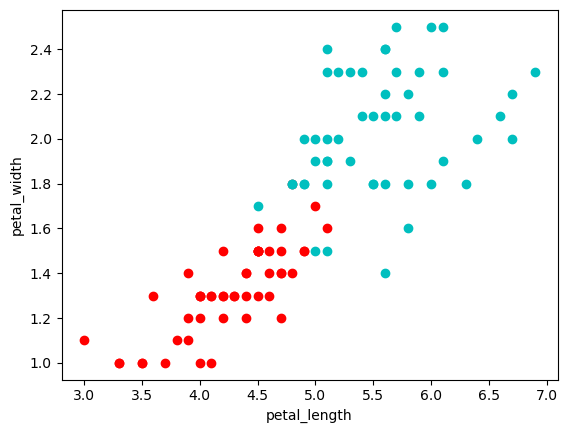

In [7]:
plt.figure()
setosa = y == 0
versicolor = y == 1
virginica = y == 2

plt.scatter(x[k1][versicolor], x[k2][versicolor], c = 'r')
plt.scatter(x[k1][virginica], x[k2][virginica], c = 'c')
plt.xlabel(k1)
plt.ylabel(k2)
plt.show()

In [12]:
x1 = x[y != 0]
y1 = y[y != 0]
x1[:5]

x1 = x1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)
y1 -= 1

print(y1.unique())
x1.head()

[0 1]


,petal_length,petal_width
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5


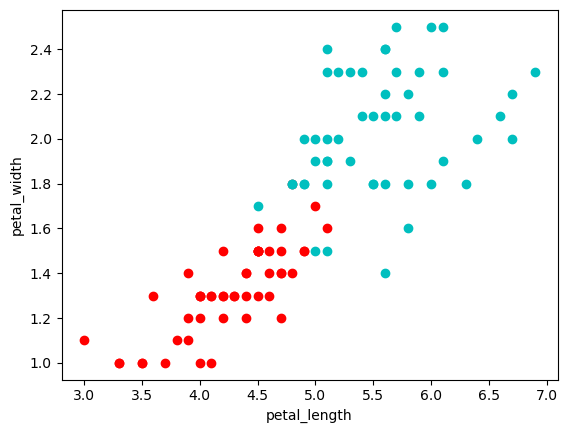

In [14]:
fig = plt.figure()

plt.scatter(x1[k1][y1==0], x1[k2][y1==0], c='r')
plt.scatter(x1[k1][y1==1], x1[k2][y1==1], c='c')

plt.xlabel(k1)
plt.ylabel(k2)
fig.savefig('main.jpg', dpi=100)
plt.show()

In [15]:
y1 = y1.astype(dtype=np.uint8)
clf0 = LinearSVC()
clf0.fit(x1, y1)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
print(clf0.coef_)
print(clf0.intercept_)

[[0.28014898 1.7009725 ]]
[-4.17111256]


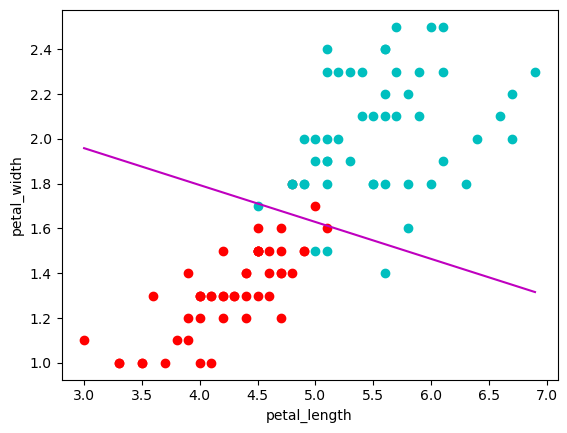

In [16]:
xmin, xmax = x1[k1].min(), x1[k1].max()
ymin, ymax = x1[k2].min(), x1[k2].max()
stepx = (xmax - xmin)/99
stepy = (ymax - ymin)/99
a0, b0, c0 = clf0.coef_[0, 0], clf0.coef_[0, 1], clf0.intercept_
# Formula for reference
# a*x + b*y + c = 0
# y = -(a*x + c)/b

lx0 = [xmin + stepx * i for i in range(100)]
ly0 = [-(a0*lx0[i] + c0)/b0 for i in range(100)]

plt.figure()

plt.scatter(x1[k1][y1==0], x1[k2][y1==0], c='r')
plt.scatter(x1[k1][y1==1], x1[k2][y1==1], c='c')

plt.plot(lx0, ly0, c='m')

plt.xlabel(k1)
plt.ylabel(k2)

plt.show()

In [29]:
x_pool, x_test, y_pool, y_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

clf0.decision_function(x_pool.iloc[6:8])

array([1.67816788, 0.1212856 ])